##Stray detection model using tflite for a custom dataset.

###Installation and importing of dependencies.

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch 

In [ ]:
from IPython.display import Image 

###Cloning YoLoV5 Model.

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 14335 (delta 45), reused 43 (delta 15), pack-reused 14242
Receiving objects: 100% (14335/14335), 13.67 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (9852/9852), done.


In [ ]:
%cd yolov5

/content/yolov5


###Importing the requirements file.

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 4.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 53.5 MB/s 


In [ ]:
pip install IProgress

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm
import IProgress
from ipywidgets import IntProgress

In [ ]:
torch.cuda.get_arch_list() 

[]

In [ ]:
print('All set. Using PyTorch version %s with %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

All set. Using PyTorch version 1.12.1+cu113 with CPU


###Unzipping the train dataset with labels.

In [ ]:
!unzip -q ../train_data.zip -d ../

###Training the YoLov5 Model

In [ ]:
!python train.py --img 500 --batch 16 --epochs 150 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=500, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, transla

###Plotting a validation batch obtained during training and inspect the confidence score of each label.

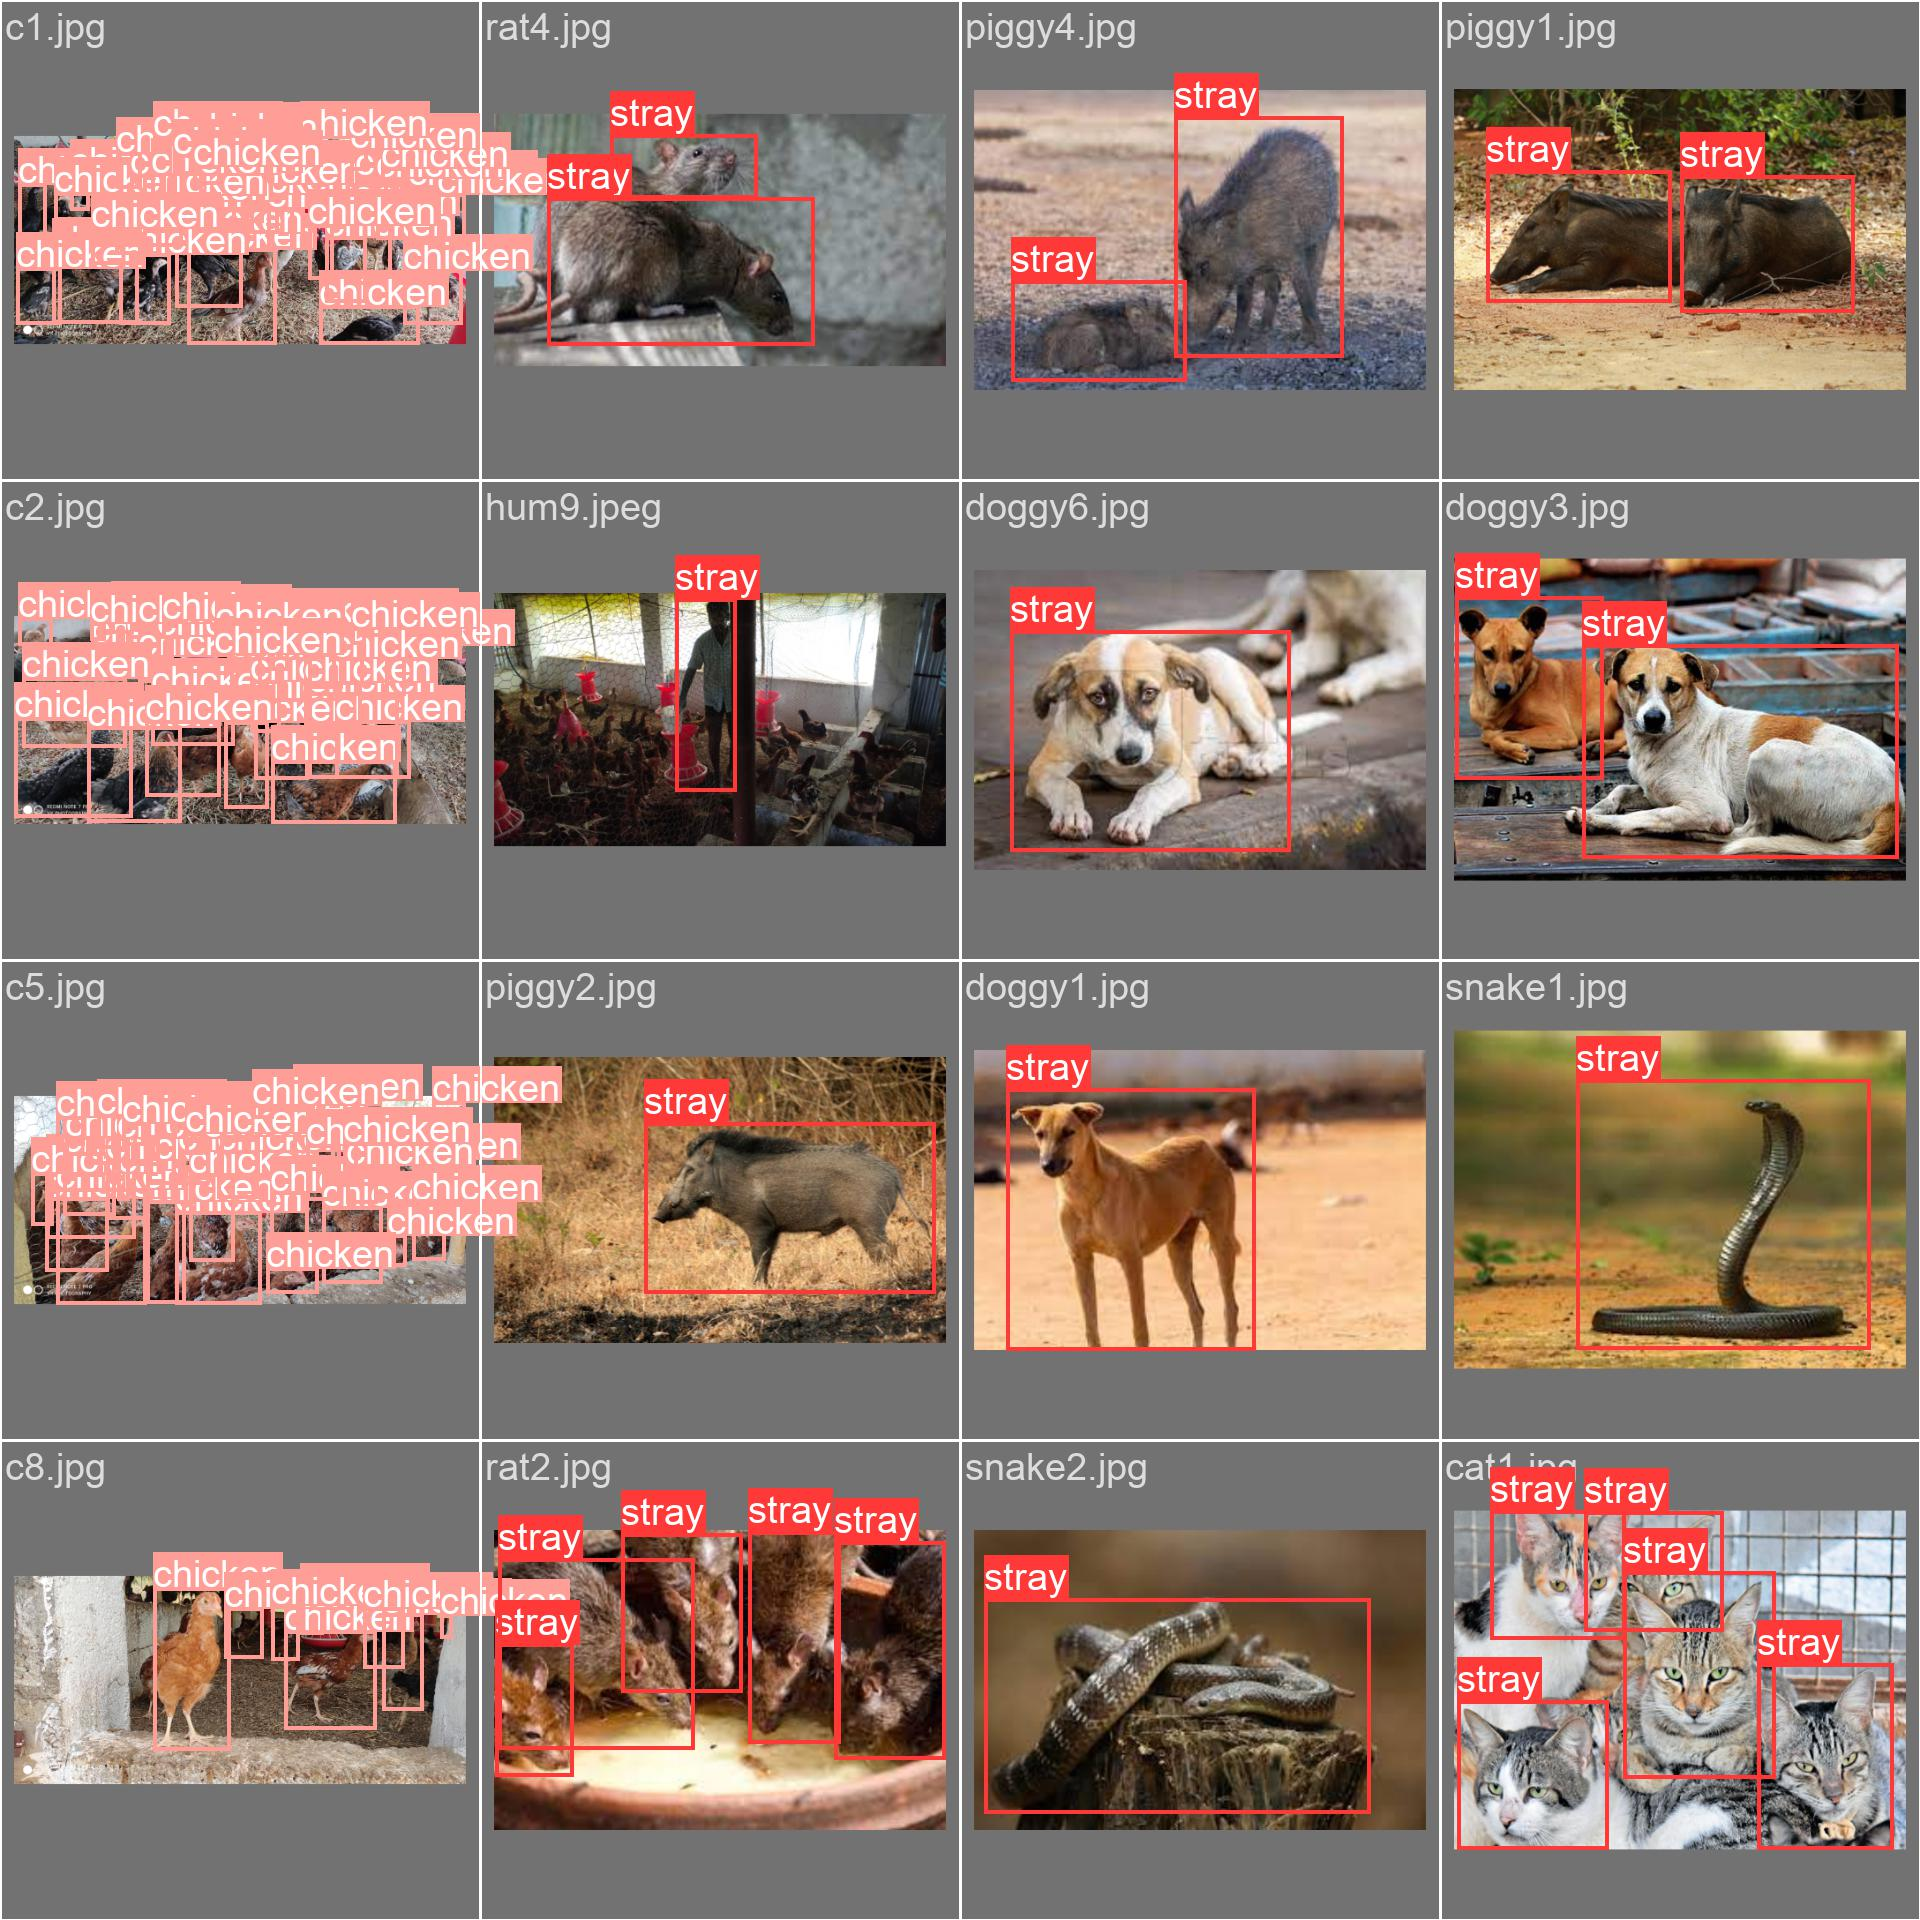

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch0_labels.jpg', width=1000)

###Testing the Model:

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 500 --conf 0.25 --source /content/yolov5/runs/train/exp/chick3.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/runs/train/exp/chick3.mp4, data=data/custom_data.yaml, imgsz=[500, 500], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [500, 500] must be multiple of max stride 32, updating to [512, 512]
video 1/1 (1/638) /content/yolov5/runs/train/exp/chick3.mp4: 288x512 12 chickens, 187.5ms
video 1/1 (2/638) /content/yolov5/runs/train/exp/chick3.mp4: 288x512 15 chickens, 170.9ms
video 1/1 (3/638) /content/yolov5/runs/train/exp/chick3.mp

###Conversion of the YoLo model into a tflite model, so that we can use it on android phone. 

In [ ]:
# Convert weights to fp16 TFLite model

!python export.py --weights /content/yolov5/runs/train/exp/weights/best.pt --include tflite --img 500

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[500], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 500 must be multiple of max stride 32, updating to 512
WARNING ⚠️ --img-size 500 must be multiple of max stride 32, updating to 512

PyTorch: starting from /content/yolov5/runs/train/exp/weights/best.pt with output shape (1, 16128, 7) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.2...

                 from  n    params  module                                  arguments                     
2022-12-06 14:56:13.2

###Creating tflite model.

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best-fp16.tflite --img 500 --conf 0.25 --source /content/yolov5/runs/train/exp/chick3.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best-fp16.tflite'], source=/content/yolov5/runs/train/exp/chick3.mp4, data=data/custom_data.yaml, imgsz=[500, 500], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CPU

Loading /content/yolov5/runs/train/exp/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
WARNING ⚠️ --img-size [500, 500] must be multiple of max stride 32, updating to [512, 512]
video 1/1 (1/638) /content/yolov5/runs/train/exp/chick3.mp4: 512x512 15 chickens, 491.1ms
video 1/1 (2/638) /content/yolov5/runs/train/exp/chick3.mp4: 512x512 15 chic

###Converting weights to int8 TFLite model.

In [ ]:
!python export.py --weights /content/yolov5/runs/train/exp/weights/best.pt --include tflite --int8 --img 500 --data data/custom_data.yaml

export: data=data/custom_data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[500], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=True, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 500 must be multiple of max stride 32, updating to 512
WARNING ⚠️ --img-size 500 must be multiple of max stride 32, updating to 512

PyTorch: starting from /content/yolov5/runs/train/exp/weights/best.pt with output shape (1, 16128, 7) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.2...

                 from  n    params  module                                  arguments                     
2022-12-06 13:45:4